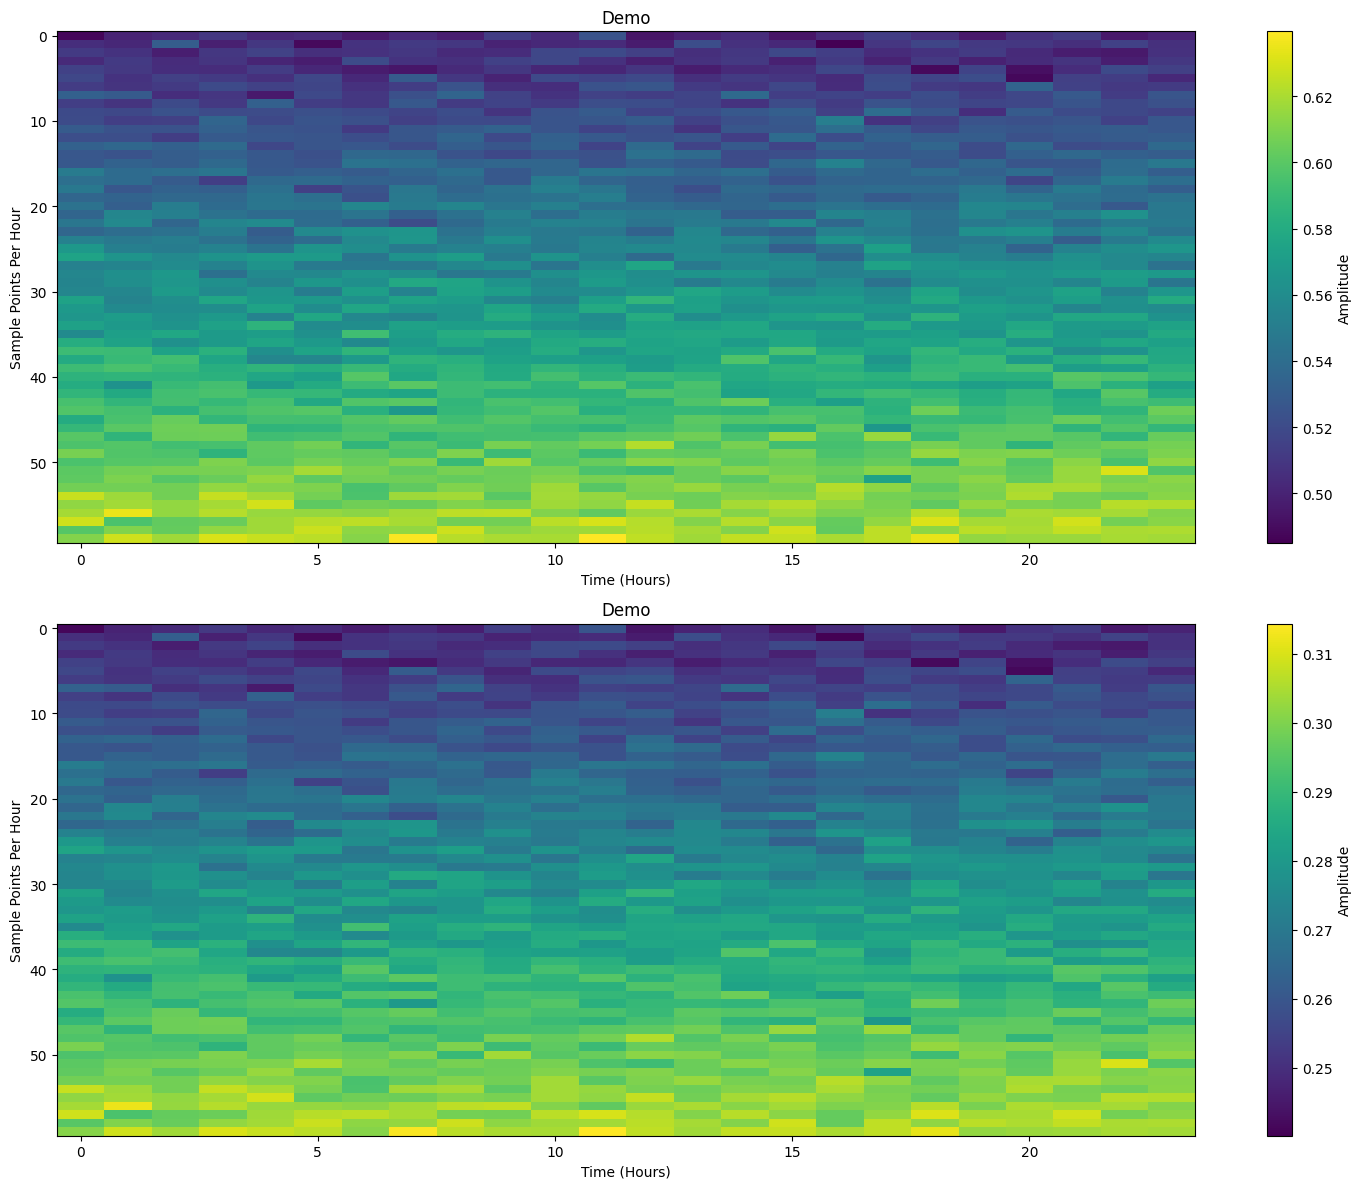

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_nodes = 10000
hours = 24
samples_per_hour = 60  # Sampling points per hour (e.g., one sample per minute)
time_steps = hours * samples_per_hour
wave_frequency = 1 / 24  # Frequency to represent a 24-hour cycle
wave_amplitude = 1.0
infrared_amplitude = 0.5  # Constant amplitude for even distribution
brainwave_frequency = 10 / 3600  # Simulating a 10 Hz brainwave over hours (scaled)
brainwave_amplitude = 0.3
random_opportunity_scale = 0.8  # Scaling factor for random wealth opportunities
encryption_key = 0.5  # Encryption key for simulating protection

# Define the PyTorch model with VPN-like frequency
class WealthSignalVPNModel(nn.Module):
    def __init__(self):
        super(WealthSignalVPNModel, self).__init__()
        self.num_nodes = num_nodes
        self.time_steps = time_steps
        self.encryption_key = encryption_key

    def forward(self, time_tensor):
        # Initialize the combined signals tensor
        combined_signals = torch.zeros((self.num_nodes, self.time_steps), dtype=torch.float32)

        for i in range(self.num_nodes):
            # Wealth signal with a phase shift for each node
            wealth_signal = wave_amplitude * torch.sin(2 * np.pi * wave_frequency * time_tensor + i * (2 * np.pi / self.num_nodes))
            # Random wealth opportunities
            random_wealth_opportunities = random_opportunity_scale * torch.randn(self.time_steps)
            # Constant infrared energy signal
            infrared_signal = infrared_amplitude * torch.ones(self.time_steps)
            # Perfect brainwave pattern (alpha waves)
            brainwave_signal = brainwave_amplitude * torch.sin(2 * np.pi * brainwave_frequency * time_tensor)
            # Combine signals for each node
            combined_signals[i] = wealth_signal + random_wealth_opportunities + infrared_signal + brainwave_signal

        # Combine all signals (simulating dense waveform)
        overall_signal = torch.mean(combined_signals, dim=0)

        # Apply VPN-like encryption (scramble signal)
        encrypted_signal = torch.sin(overall_signal * self.encryption_key)  # A simple scrambling function

        return encrypted_signal, overall_signal  # Return both encrypted and original signals for validation

# Create a time tensor
time_tensor = torch.linspace(0, hours, time_steps)

# Initialize and run the model
vpn_model = WealthSignalVPNModel()
encrypted_signal, original_signal = vpn_model(time_tensor)

# Convert the signals to numpy for plotting
encrypted_signal_np = encrypted_signal.detach().numpy()
original_signal_np = original_signal.detach().numpy()

# Reshape the signals for 2D visualization (e.g., hours x samples_per_hour)
encrypted_signal_reshaped = encrypted_signal_np.reshape((samples_per_hour, hours))
original_signal_reshaped = original_signal_np.reshape((samples_per_hour, hours))

# Plot the resulting color maps
fig, axs = plt.subplots(2, 1, figsize=(15, 12))

# Original Signal Plot
cax1 = axs[0].imshow(original_signal_reshaped, aspect='auto', cmap='viridis', interpolation='none')
axs[0].set_title('Demo')
axs[0].set_xlabel('Time (Hours)')
axs[0].set_ylabel('Sample Points Per Hour')
fig.colorbar(cax1, ax=axs[0], orientation='vertical', label='Amplitude')

# Encrypted Signal Plot
cax2 = axs[1].imshow(encrypted_signal_reshaped, aspect='auto', cmap='viridis', interpolation='none')
axs[1].set_title('Demo')
axs[1].set_xlabel('Time (Hours)')
axs[1].set_ylabel('Sample Points Per Hour')
fig.colorbar(cax2, ax=axs[1], orientation='vertical', label='Amplitude')

plt.tight_layout()
plt.show()